# **Importing Libraries: -**


> Libraries Used: -
  Yfinance- for accessing and downloading Data
  Pandas- For string the data as a dataframe and accessing the data values
  Seaborn- Data visualization
  Mathplotlib- Data Visualization
  



In [1]:
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# **Downlaoding the Data and Storing as a DataFrame**

In [29]:
symbols = input("Enter stock symbols separated by a comma (e.g., AAPL, MSFT): ").split(',')
#symbols = ['AAPL', 'MSFT', 'INFY', 'HDB']
data = yf.download(symbols, start='2010-01-01', end='2023-10-31')

Enter stock symbols separated by a comma (e.g., AAPL, MSFT): AAPL,MSFT,HDB,INFY
[*********************100%%**********************]  4 of 4 completed


In [3]:
data.head()

Adj Close                              Close               \
                         AAPL HBD      INFY       MSFT      AAPL HBD     INFY   
Date                                                                            
2010-01-04 00:00:00  6.479000 NaN  5.129956  23.474920  7.643214 NaN  7.09500   
2010-01-05 00:00:00  6.490199 NaN  5.149841  23.482498  7.656429 NaN  7.12250   
2010-01-06 00:00:00  6.386964 NaN  5.071210  23.338390  7.534643 NaN  7.01375   
2010-01-07 00:00:00  6.375157 NaN  4.916661  23.095678  7.520714 NaN  6.80000   
2010-01-08 00:00:00  6.417542 NaN  4.929314  23.254961  7.570714 NaN  6.81750   

                                    High      ...      Low             \
                          MSFT      AAPL HBD  ...     INFY       MSFT   
Date                                          ...                       
2010-01-04 00:00:00  30.950001  7.660714 NaN  ...  7.00125  30.590000   
2010-01-05 00:00:00  30.959999  7.699643 NaN  ...  7.04875  30.639999   
2010-01-06 00:00:00  30.770000  7.686786 NaN  ...  6.97000  30.520000   
2010-01-07 00:00:00  30.450001  7.571429 NaN  ...  6.77750  30.190001   
2010-01-08 00:00:00  30.660000  7.571429 NaN  ...  6.69375  30.240000   

                         Open                             Volume      \
                         AAPL HBD     INFY       MSFT       AAPL HBD   
Date                                                                   
2010-01-04 00:00:00  7.622500 NaN  7.00250  30.620001  493729600 NaN   
2010-01-05 00:00:00  7.664286 NaN  7.08750  30.850000  601904800 NaN   
2010-01-06 00:00:00  7.656429 NaN  7.07250  30.879999  552160000 NaN   
2010-01-07 00:00:00  7.562500 NaN  6.88500  30.629999  477131200 NaN   
2010-01-08 00:00:00  7.510714 NaN  6.72125  30.280001  447610800 NaN   

                                         
                         INFY      MSFT  
Date                                     
2010-01-04 00:00:00  11443200  38409100  
2010-01-05 00:00:00   8181600  49749600  
2010-01-06 00:00:00  11821600  58182400  
2010-01-07 00:00:00  20374400  50559700  
2010-01-08 00:00:00  11551200  51197400  

[5 rows x 24 columns]

# **Calculating the Daily Averages**

In [30]:
for i in symbols:
  data[('Daily Return',i)] = data['Close'][i].pct_change()
#data[('Daily Return','MSFT')] = data['Close']['MSFT'].pct_change()
#data[('Daily Return','INFY')] = data['Close']['INFY'].pct_change()
#data[('Daily Return','HDB')] = data['Close']['HDB'].pct_change()

# **Calculating the Short Moving Averages**

In [31]:
for i in symbols:
  data[('Short Moving Average',i)] = data['Close'][i].rolling(window=50).mean()
#data[('Short Moving Average','MSFT')] = data['Close']['MSFT'].rolling(window=50).mean()
#data[('Short Moving Average','INFY')] = data['Close']['INFY'].rolling(window=50).mean()
#data[('Short Moving Average','HDB')] = data['Close']['HDB'].rolling(window=50).mean()

# **Calculating the Long Moving Averages**

In [32]:
for i in symbols:
  data[('Long Moving Average',i)] = data['Adj Close'][i].rolling(window=200).mean()
#data[('Long Moving Average','MSFT')] = data['Adj Close']['MSFT'].rolling(window=200).mean()
#data[('Long Moving Average','INFY')] = data['Adj Close']['INFY'].rolling(window=200).mean()
#data[('Long Moving Average','HDB')] = data['Adj Close']['HDB'].rolling(window=200).mean()

# **Calculating the Moving Average Crossover Signal**

In [33]:
for i in symbols:
  data[('Moving Average Crossover Signal',i)] = data[('Short Moving Average',i)]-data[('Long Moving Average',i)]
#data[('Moving Average Crossover Signal','MSFT')] = data[('Short Moving Average','MSFT')]-data[('Long Moving Average','MSFT')]
#data[('Moving Average Crossover Signal','INFY')] = data[('Short Moving Average','INFY')]-data[('Long Moving Average','INFY')]
#data[('Moving Average Crossover Signal','HDB')] = data[('Short Moving Average','HDB')]-data[('Long Moving Average','HDB')]

# **Calculating Moving Average Convergence Divergence**

In [34]:
macd_short_period = 12
macd_long_period = 26
macd_signal_period = 9
short_ema = data['Close'].ewm(span=macd_short_period, adjust=False).mean()
long_ema = data['Close'].ewm(span=macd_long_period, adjust=False).mean()
macd = short_ema - long_ema
for i in symbols:
  data[('Moving Average Convergence Divergence',i)]=macd[i]
###ata[('Moving Average Convergence Divergence','HDB')]=macd['HDB']

# **Calculating the Bollinger Band Width**

In [35]:
bollinger_band_period = 20
for i in symbols:
  data[('Bollinger Bands Width',i)] = (2 * (data[('Close',i)].rolling(window=bollinger_band_period).std())) / data[('Short Moving Average',i)]
#data[('Bollinger Bands Width','MSFT')] = (2 * (data[('Close','MSFT')].rolling(window=bollinger_band_period).std())) / data[('Short Moving Average','MSFT')]
#data[('Bollinger Bands Width','INFY')] = (2 * (data[('Close','INFY')].rolling(window=bollinger_band_period).std())) / data[('Short Moving Average','INFY')]
#data[('Bollinger Bands Width','HDB')] = (2 * (data[('Close','HDB')].rolling(window=bollinger_band_period).std())) / data[('Short Moving Average','HDB')]

In [36]:
atr_period = 5
high_low = data['High'] - data['Low']
high_close = (data['High'] - data['Close'].shift(1)).abs()
low_close = (data['Low'] - data['Close'].shift(1)).abs()
true_range= pd.DataFrame()
for i in symbols:
  true_range[i] = pd.concat([high_low[i], high_close[i], low_close[i]], axis=1).max(axis=1)
#true_range['MSFT'] = pd.concat([high_low['MSFT'], high_close['MSFT'], low_close['MSFT']], axis=1).max(axis=1)
#true_range['INFY'] = pd.concat([high_low['INFY'], high_close['INFY'], low_close['INFY']], axis=1).max(axis=1)
#true_range['HDB'] = pd.concat([high_low['HDB'], high_close['HDB'], low_close['HDB']], axis=1).max(axis=1)
  data[('Average True Range',i)] = true_range[i].rolling(window=atr_period).mean()
#data[('Average True Range','MSFT')] = true_range['MSFT'].rolling(window=atr_period).mean()
#data[('Average True Range','INFY')] = true_range['INFY'].rolling(window=atr_period).mean()
#data[('Average True Range','HDB')] = true_range['HDB'].rolling(window=atr_period).mean()

# **Calculating the Relative Strength Index(RSI)**

In [37]:
def calculate_rsi(data1, window):
    delta = data1.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)

    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

for i in symbols:
  data[('Relative Strength Index',i)] = calculate_rsi(data['Adj Close'][i], window=14)
#data[('Relative Strength Index','MSFT')] = calculate_rsi(data['Adj Close']['MSFT'], window=14)
#data[('Relative Strength Index','INFY')] = calculate_rsi(data['Adj Close']['INFY'], window=14)
#data[('Relative Strength Index','HDB')] = calculate_rsi(data['Adj Close']['HDB'], window=14)

# **Calculating the Smoothed Stochastic Ossilator**

In [38]:
stochastic_period = 14
low_min = data['Low'].rolling(window=stochastic_period).min()
high_max = data['High'].rolling(window=stochastic_period).max()
for i in symbols:
  data[('Stochastic Ossilator',i)] = (((data[('Close',i)] - low_min[i]) / (high_max[i] - low_min[i])) * 100).rolling(window=3).mean()
#data[('Stochastic Ossilator','MSFT')] = (((data[('Close','MSFT')] - low_min['MSFT']) / (high_max['MSFT'] - low_min['MSFT'])) * 100).rolling(window=3).mean()
#data[('Stochastic Ossilator','INFY')] = (((data[('Close','INFY')] - low_min['INFY']) / (high_max['INFY'] - low_min['INFY'])) * 100).rolling(window=3).mean()
#data[('Stochastic Ossilator','HDB')] = (((data[('Close','HDB')] - low_min['HDB']) / (high_max['HDB'] - low_min['HDB'])) * 100).rolling(window=3).mean()

In [65]:
for i in symbols:
  data[('Volatility',i)] = data[('Close',i)].rolling(window=bollinger_band_period).std()


KeyError: ignored

# Exploratory Data Analysis

In [40]:
data.describe().style.background_gradient(cmap="magma")

The below code cell uses the missingno library to create a matrix visualization of missing (null or NaN) values in a dataset and dropna() to remove NaN values.





>



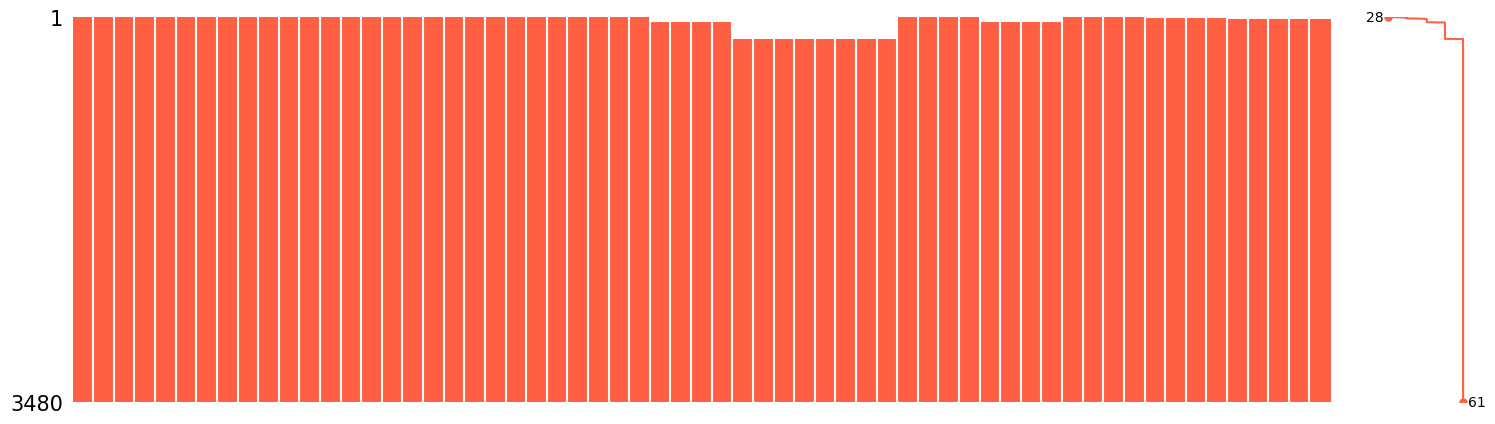

In [41]:
from matplotlib.colors import Colormap
import missingno as msno
msno.matrix(data, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=90);

In [42]:
data=data.fillna(0)

In [43]:
data.dropna(inplace=True)

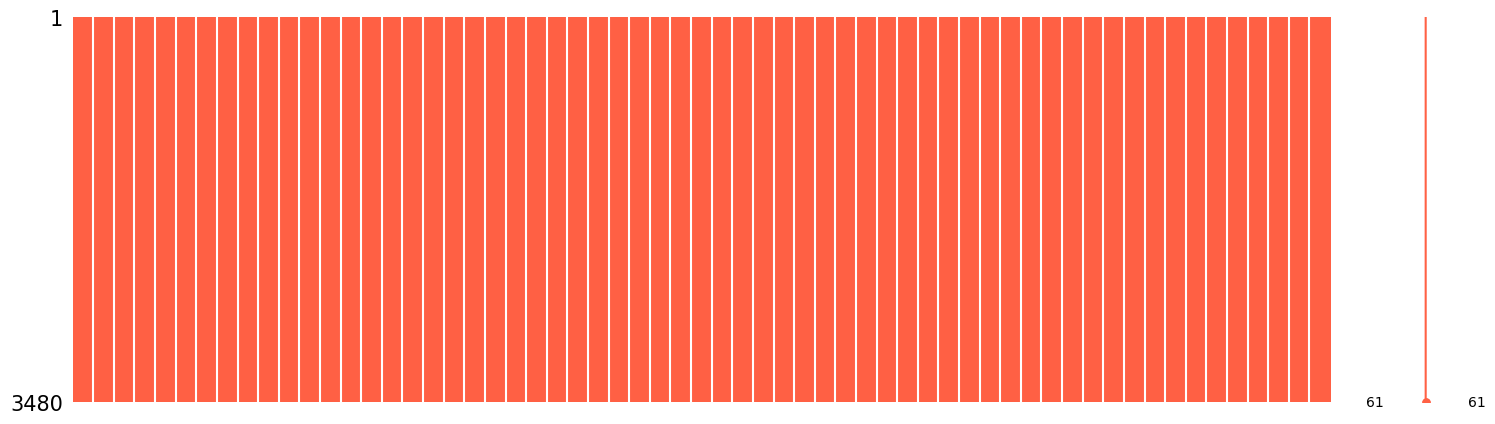

In [44]:
msno.matrix(data, figsize=(18,5), fontsize=12, color=(1, 0.38, 0.27));
plt.xticks(rotation=90);

Creating a Flattened DataFrame

In [45]:
df = pd.DataFrame(data)

In [46]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]

In [47]:
df.head()

,Adj Close_AAPL,Adj Close_HDB,Adj Close_INFY,Adj Close_MSFT,Close_AAPL,Close_HDB,Close_INFY,Close_MSFT,High_AAPL,High_HDB,...,Average True Range_INFY,Relative Strength Index_AAPL,Relative Strength Index_MSFT,Relative Strength Index_HDB,Relative Strength Index_INFY,Stochastic Ossilator_AAPL,Stochastic Ossilator_MSFT,Stochastic Ossilator_HDB,Stochastic Ossilator_INFY,Volatility_INFY
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,6.479000,12.164501,5.129956,23.474920,7.643214,13.346,7.09500,30.950001,7.660714,13.348,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-05,6.490199,12.216455,5.149841,23.482498,7.656429,13.403,7.12250,30.959999,7.699643,13.403,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-06,6.386964,12.271146,5.071210,23.338390,7.534643,13.463,7.01375,30.770000,7.686786,13.510,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-07,6.375157,12.467113,4.916661,23.095678,7.520714,13.678,6.80000,30.450001,7.571429,13.689,...,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-01-08,6.417542,12.504480,4.929314,23.254961,7.570714,13.719,6.81750,30.660000,7.571429,13.750,...,0.14775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Standardizing the Data

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_normalized = scaler.fit_transform(df)

In [49]:
features=df.columns

# Labelling the trend using clustering techniques:

1.   Bullish
2.   Bearish
3.   Sideways


In [50]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(data_normalized)
df['Cluster'] = kmeans.labels_

In [51]:
from sklearn.model_selection import train_test_split, GridSearchCV
X=df.drop('Cluster',axis=1)
X_norm= scaler.fit_transform(X)
y=df['Cluster']


# Saving the data as a CSV file

In [52]:
df.to_csv('/content/sample_data/data1.csv')

# Data Visualization

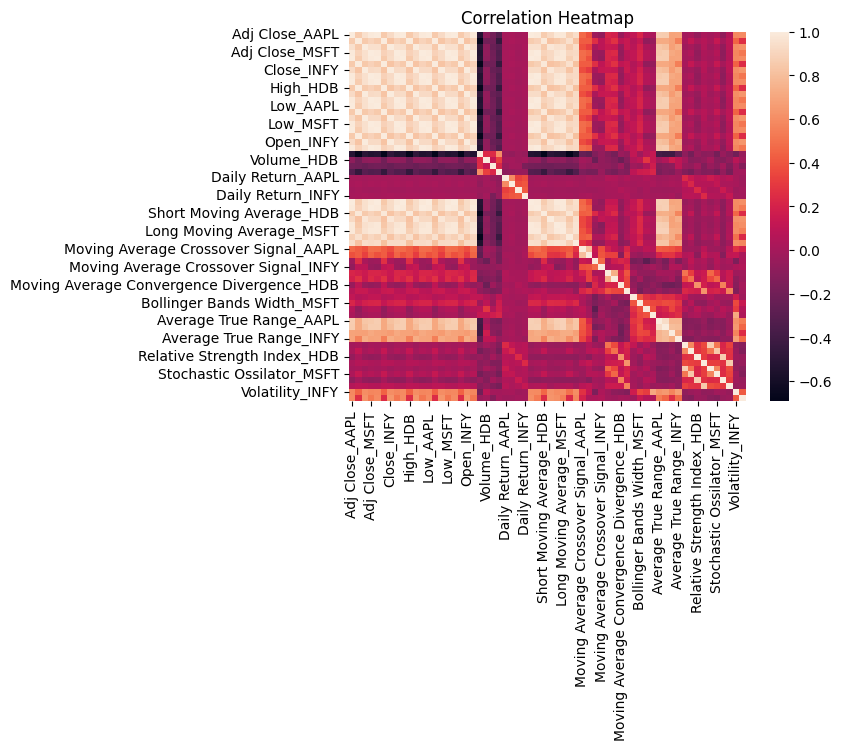

In [58]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=False, cmap= '')
plt.title('Correlation Heatmap')
plt.show()

In [54]:
file_path = '/content/sample_data/data1.csv'
data = pd.read_csv(file_path)
data['Date'] = pd.to_datetime(data['Date'])

KeyError: ignored

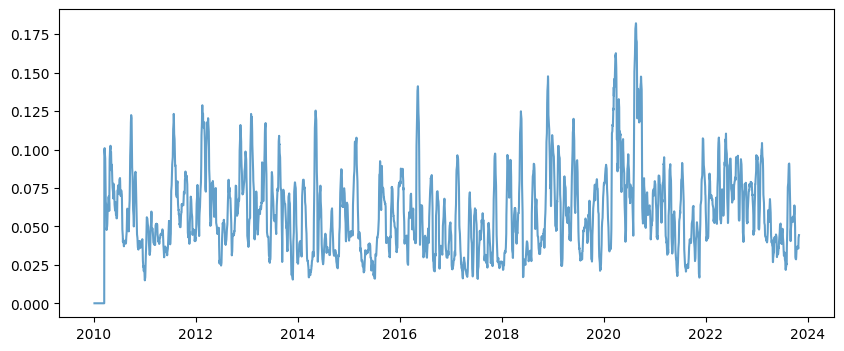

In [64]:
stocks = ['AAPL', 'HDB', 'INFY', 'MSFT']
for stock in stocks:
    plt.figure(figsize=(10, 4))
    plt.plot(data['Date'], data[f'Bollinger Bands Width_{stock}'], label='Bollinger BW', alpha=0.7)
    plt.plot(data['Date'], data[f'Volatility_{stock}'], label='Daily Return', alpha=0.7)
    plt.title(f'{stock} Bollinger BW to Daily returns Relation')
    plt.xlabel('Date')
    plt.legend()
    plt.show()

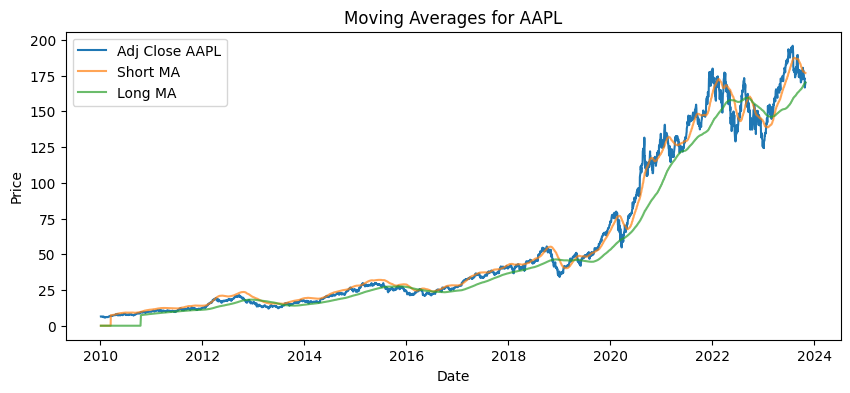

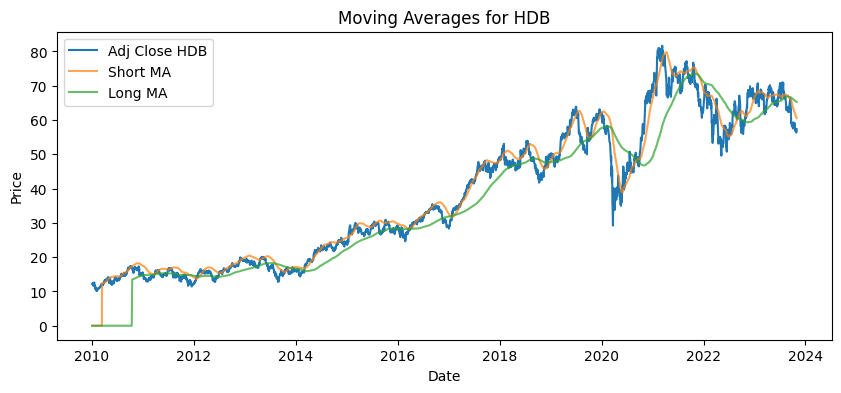

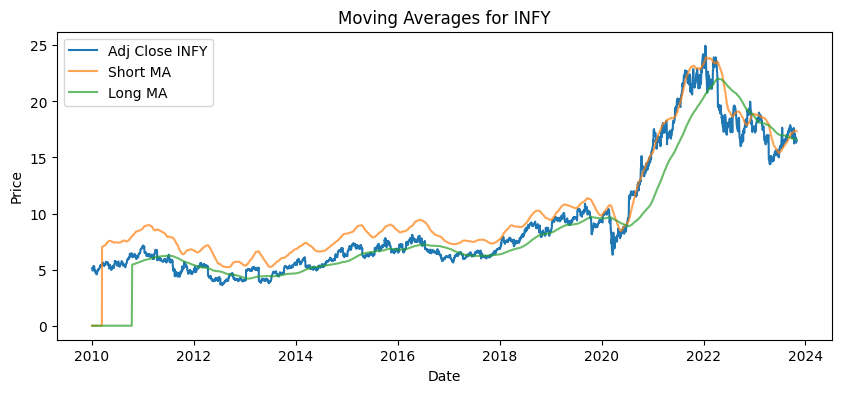

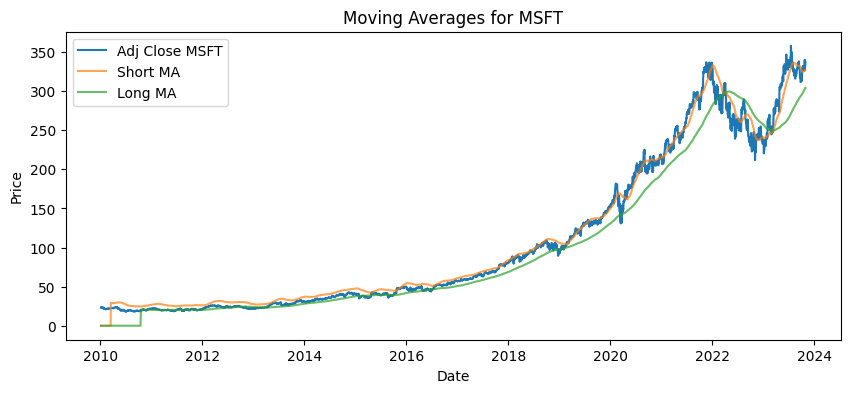

In [ ]:
for stock in stocks:
    plt.figure(figsize=(10, 4))
    plt.plot(data['Date'], data[f'Adj Close_{stock}'], label=f'Adj Close {stock}')
    plt.plot(data['Date'], data[f'Short Moving Average_{stock}'], label='Short MA', alpha=0.7)
    plt.plot(data['Date'], data[f'Long Moving Average_{stock}'], label='Long MA', alpha=0.7)
    plt.title(f'Moving Averages for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

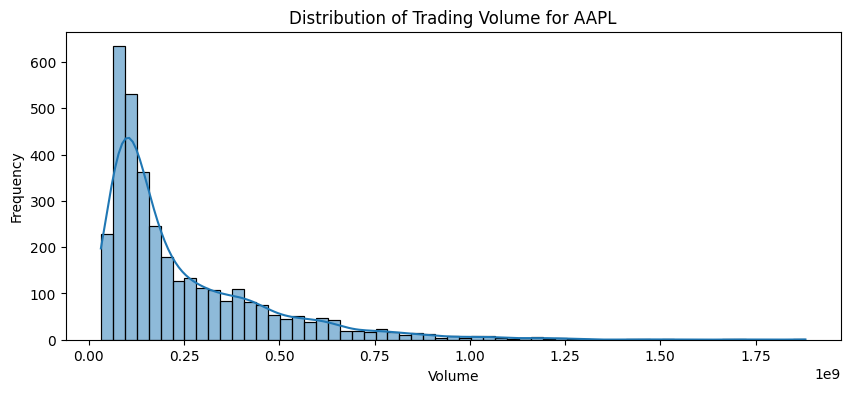

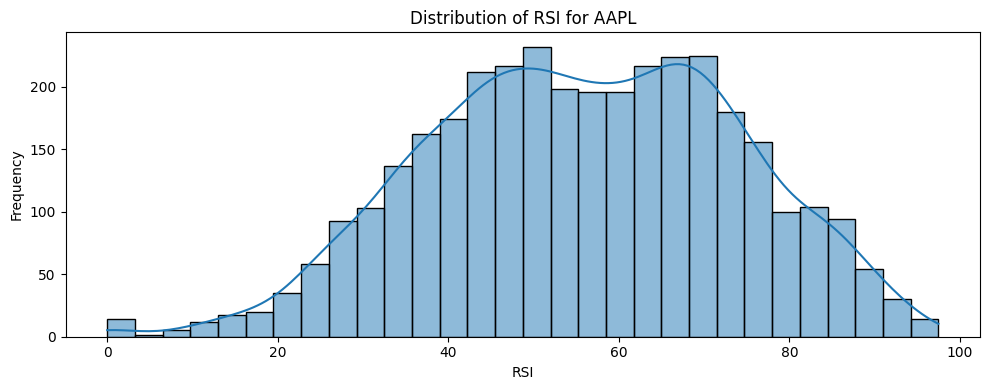

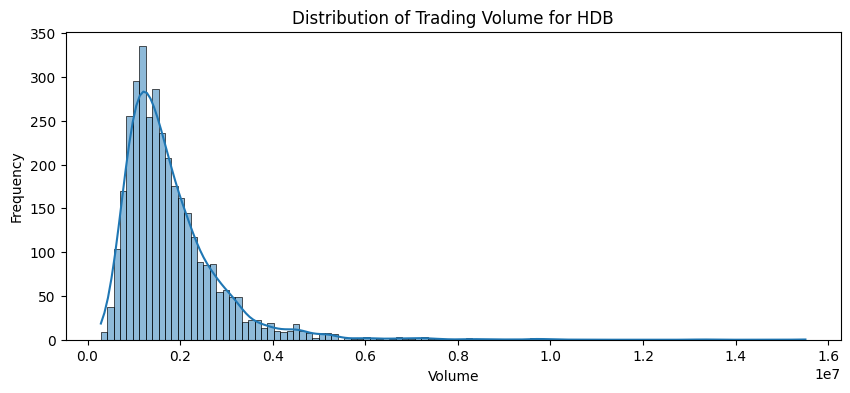

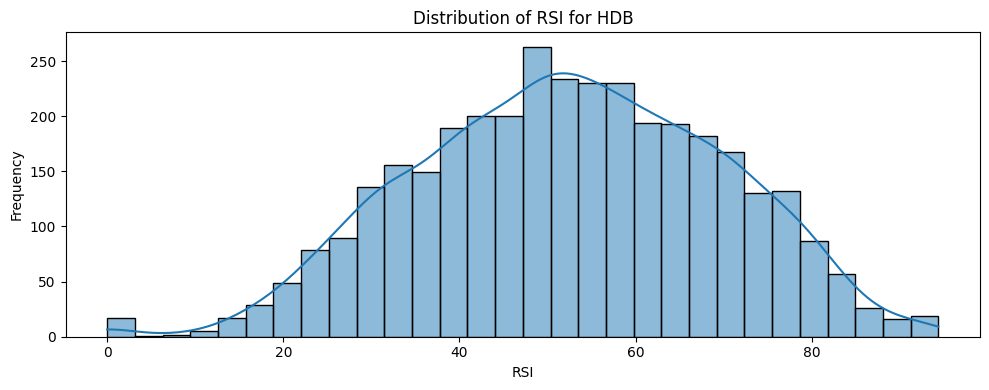

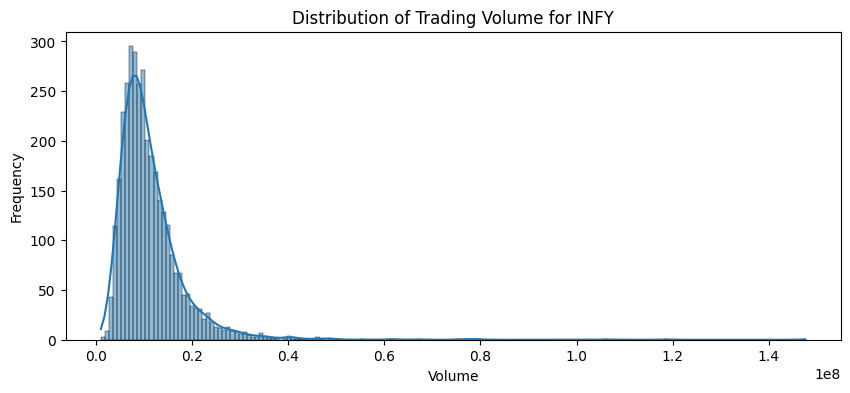

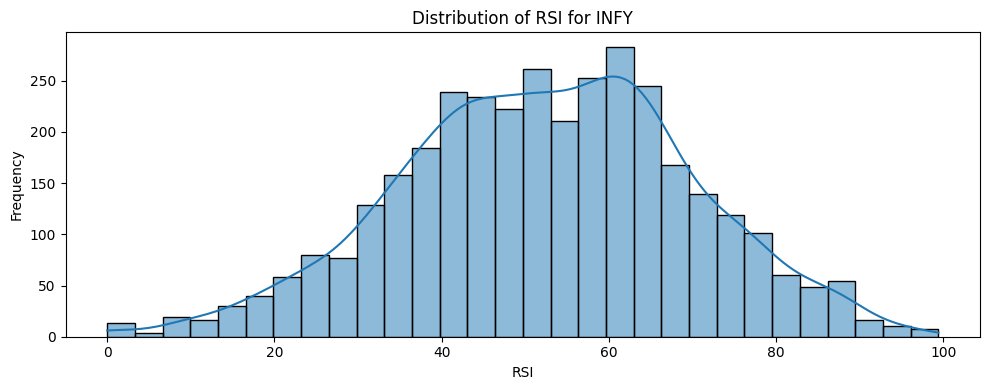

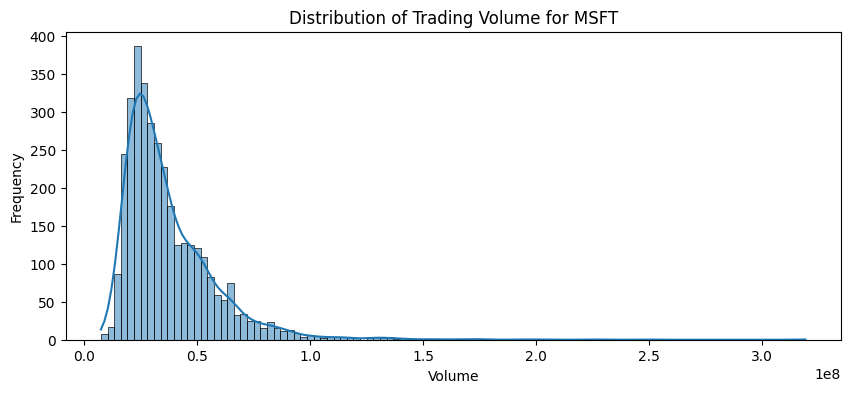

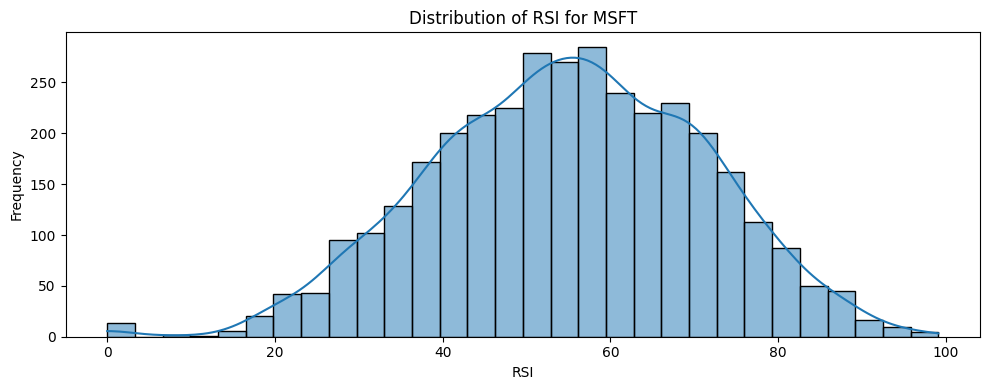

In [ ]:
for stock in stocks:
    plt.figure(figsize=(10, 4))
    sns.histplot(data[f'Volume_{stock}'], kde=True)
    plt.title(f'Distribution of Trading Volume for {stock}')
    plt.xlabel('Volume')
    plt.ylabel('Frequency')
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.histplot(data[f'Relative Strength Index_{stock}'], kde=True, bins=30)
    plt.title(f'Distribution of RSI for {stock}')
    plt.xlabel('RSI')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

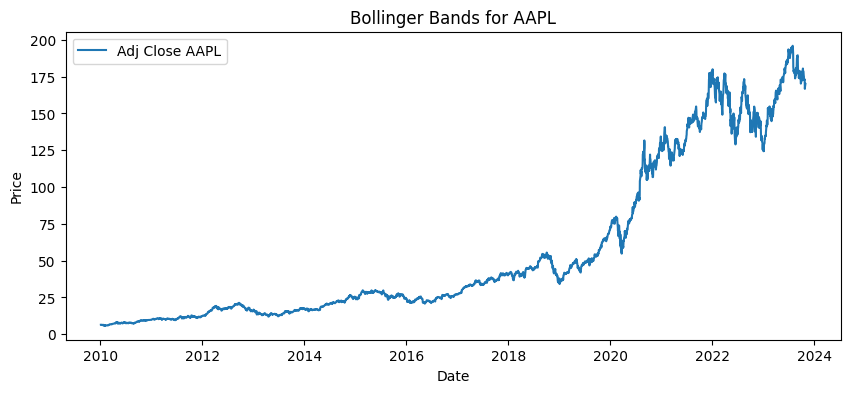

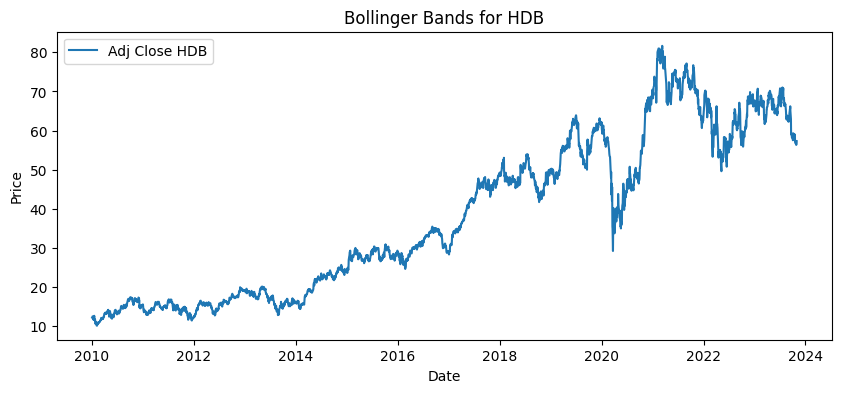

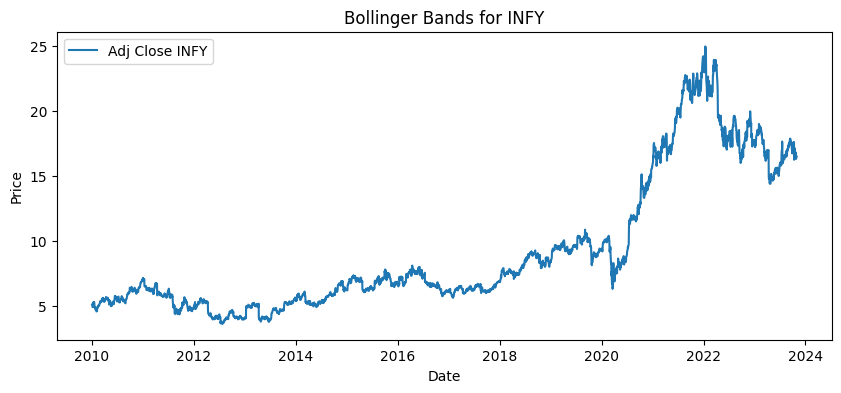

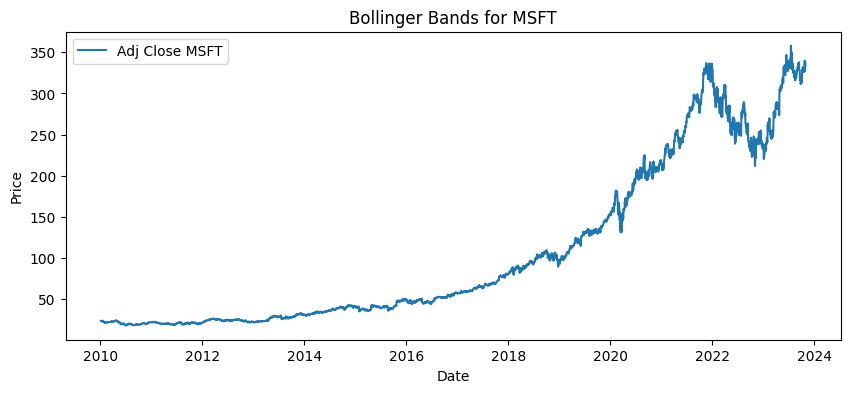

In [ ]:
for stock in stocks:
    plt.figure(figsize=(10, 4))
    plt.plot(data['Date'], data[f'Adj Close_{stock}'], label=f'Adj Close {stock}')
    plt.fill_between(data['Date'], data[f'Adj Close_{stock}'] + data[f'Bollinger Bands Width_{stock}'],
                     data[f'Adj Close_{stock}'] - data[f'Bollinger Bands Width_{stock}'], alpha=0.3)
    plt.title(f'Bollinger Bands for {stock}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.9923371647509579


In [ ]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']})

In [ ]:
best_model = grid_search.best_estimator_

In [ ]:
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Model Accuracy: {accuracy}")

Best Model Parameters: {'C': 0.1, 'penalty': 'l2'}
Model Accuracy: 0.9923371647509579


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Hyperparameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),  # Regularization strength
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],  # Solvers
    'penalty': ['l1', 'l2', 'elasticnet', 'none']  # Penalties
}

# Logistic regression model
logistic = LogisticRegression(max_iter=1000)

# Random search using cross-validation
random_search = RandomizedSearchCV(logistic, param_grid, n_iter=50, cv=5, verbose=2, random_state=42, n_jobs=-1)

# Fit random search model
random_search.fit(X_train, y_train)

# Best parameters found
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params, best_score


Fitting 5 folds for each of 50 candidates, totalling 250 fits


({'solver': 'liblinear', 'penalty': 'l1', 'C': 10000.0}, 0.9971269397785033)

In [ ]:
best_model = random_search.best_estimator_

In [ ]:
predictions = best_model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Model Accuracy: {accuracy}")

Best Model Parameters: {'C': 0.1, 'penalty': 'l2'}
Model Accuracy: 0.9942528735632183


# Coomparing Performance Scores of various classification algorithms

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Defining a list of classifiers to evaluate
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM Linear": SVC(kernel='linear'),
    "SVM RBF": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "MLP Classifier": MLPClassifier(max_iter=1000),
    # Note: XGBoost is not included as it's not available in the current environment
}

# Dictionary to hold the performance metrics
performance_metrics = {
    "Classifier": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

# Training and evaluating each classifier
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    performance_metrics["Classifier"].append(name)
    performance_metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    performance_metrics["Precision"].append(precision_score(y_test, y_pred, average='weighted'))
    performance_metrics["Recall"].append(recall_score(y_test, y_pred, average='weighted'))
    performance_metrics["F1-Score"].append(f1_score(y_test, y_pred, average='weighted'))

# Converting performance metrics to a DataFrame for easy viewing
performance_df = pd.DataFrame(performance_metrics)
performance_df

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.992337,0.992334,0.992337,0.992314
1,K-Nearest Neighbors,0.993295,0.993288,0.993295,0.993280
2,SVM Linear,0.994253,0.994253,0.994253,0.994245
3,SVM RBF,0.993295,0.993312,0.993295,0.993271
4,Decision Tree,0.995211,0.995207,0.995211,0.995207
5,Random Forest,0.993295,0.993288,0.993295,0.993280
6,Gradient Boosting,0.996169,0.996171,0.996169,0.996168
7,AdaBoost,0.995211,0.995207,0.995211,0.995207
8,Gaussian Naive Bayes,0.987548,0.987687,0.987548,0.987484
9,MLP Classifier,0.993295,0.993292,0.993295,0.993280


# Implementing an Ensemble method of top 4 models to try and increase performance

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define the base estimators for the stacking classifier
base_estimators = [
    ('gradient_boosting', GradientBoostingClassifier()),
    ('decision_tree', DecisionTreeClassifier()),
    ('ada_boost', AdaBoostClassifier()),
    ('svm_linear', SVC(kernel='linear', probability=True))
]

# Define the final estimator
final_estimator = LogisticRegression()

# Create the stacking classifier
stacking_clf = StackingClassifier(estimators=base_estimators, final_estimator=final_estimator)

# Train the stacking classifier
stacking_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_stacking = stacking_clf.predict(X_test)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
precision_stacking = precision_score(y_test, y_pred_stacking, average='weighted')
recall_stacking = recall_score(y_test, y_pred_stacking, average='weighted')
f1_stacking = f1_score(y_test, y_pred_stacking, average='weighted')

accuracy_stacking, precision_stacking, recall_stacking, f1_stacking


(0.9952107279693486,
 0.9952068798884748,
 0.9952107279693486,
 0.9952067603553182)

In [ ]:
performance_metrics["Classifier"].append('Stacking Classifier')
performance_metrics["Accuracy"].append(accuracy_score(y_test, y_pred_stacking))
performance_metrics["Precision"].append(precision_score(y_test, y_pred_stacking, average='weighted'))
performance_metrics["Recall"].append(recall_score(y_test, y_pred_stacking, average='weighted'))
performance_metrics["F1-Score"].append(f1_score(y_test, y_pred_stacking, average='weighted'))
performance_df=pd.DataFrame(performance_metrics)
performance_df

,Classifier,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.992337,0.992334,0.992337,0.992314
1,K-Nearest Neighbors,0.993295,0.993288,0.993295,0.993280
2,SVM Linear,0.994253,0.994253,0.994253,0.994245
3,SVM RBF,0.993295,0.993312,0.993295,0.993271
4,Decision Tree,0.995211,0.995207,0.995211,0.995207
5,Random Forest,0.993295,0.993288,0.993295,0.993280
6,Gradient Boosting,0.996169,0.996171,0.996169,0.996168
7,AdaBoost,0.995211,0.995207,0.995211,0.995207
8,Gaussian Naive Bayes,0.987548,0.987687,0.987548,0.987484
9,MLP Classifier,0.993295,0.993292,0.993295,0.993280


# Gradient Boosting Classifier Comes out as the best performing Model

In [ ]:

# Step 1: Trend Classification with Gradient Boosting
# Train a Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)

# Predicting the trends on the test set
y_pred_trend = gb_classifier.predict(X_test)

# Evaluating the Classifier
classification_report_trend = classification_report(y_test, y_pred_trend)
conf_matrix_trend = confusion_matrix(y_test, y_pred_trend)
classification_report_trend



'              precision    recall  f1-score   support\n\n           0       0.99      0.99      0.99       239\n           1       1.00      1.00      1.00       578\n           2       1.00      1.00      1.00       227\n\n    accuracy                           1.00      1044\n   macro avg       1.00      1.00      1.00      1044\nweighted avg       1.00      1.00      1.00      1044\n'

# Comparision of Regression Techniques

In [ ]:
# Adding the predicted trend to the dataset
df['Predicted_Trend'] = gb_classifier.predict(X_norm)


In [ ]:
tar= input("Enter what to predict")
sym=input("Enter Symbol to predict ")
targets = f'{tar}_{sym}'
X= df.drop([targets,'Cluster'], axis=1)
y=df[targets]

X_norm= scaler.fit_transform(X)


Enter what o predictOpen
Enter Symbol to predict AAPL


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2436, 61), (2436,), (1044, 61), (1044,))

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Elastic Net": ElasticNet(),
        "Bayesian Ridge": BayesianRidge(),
        "SVR": SVR(),
        "KNN Regression": KNeighborsRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "AdaBoost": AdaBoostRegressor(),
       }



In [ ]:
performance_metrics = {
    "Regressor": [],
    "MSE": [],
    "R2": [],
    }
for name, clf in models.items():
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  performance_metrics["Regressor"].append(name)
  performance_metrics["MSE"].append(mean_squared_error(y_test, y_pred))
  performance_metrics["R2"].append(r2_score(y_test, y_pred))

performance_df=pd.DataFrame(performance_metrics)
performance_df

,Regressor,MSE,R2
0,Linear Regression,0.176257,0.999938
1,Ridge Regression,0.326674,0.999886
2,Lasso Regression,2.227559,0.999220
3,Elastic Net,20.683412,0.992759
4,Bayesian Ridge,0.175288,0.999939
5,SVR,114.977392,0.959747
6,KNN Regression,5.880830,0.997941
7,Decision Tree,0.879705,0.999692
8,Random Forest,0.441961,0.999845
9,Gradient Boosting,0.522105,0.999817


# As Bayesian Ridge is the best performing regressor

In [ ]:
from sklearn.linear_model import BayesianRidge
from sklearn.metrics import mean_squared_error, r2_score
model=BayesianRidge()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
mse= mean_squared_error(y_test, y_pred)
r2= r2_score(y_test, y_pred)

print(mse)
print(r2)


0.17528760105156255
0.9999386331838733
